In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

import seaborn as sns

In [2]:
data = pd.read_csv('bank-full.csv', sep =';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
color = sns.color_palette("Paired")
%matplotlib inline

#### Unknown Values

In [4]:
data.shape

(45211, 17)

In [5]:
unknown_proportion = np.mean(data =='unknown', axis = 0)
index = unknown_proportion>0
unknown_proportion = unknown_proportion[index]*100
unknown_proportion

job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64

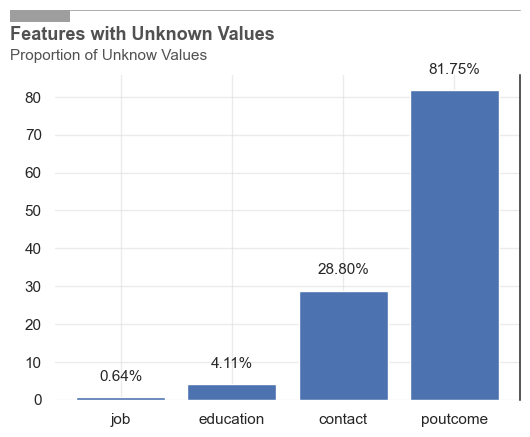

In [6]:
fig, ax = plt.subplots(figsize = (6,5))


graph = ax.bar(unknown_proportion.index, unknown_proportion)

# add labels
ax.bar_label(graph, fmt='%.2f%%', padding =10, size = 11)
#ax.set_xlim(right=30) 

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.92, s="Features with Unknown Values", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.05, y=.88, s="Proportion of Unknow Values", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)



plt.show()

### Imbalanced Data

In [7]:
imbalanced = data['y'].value_counts(normalize = True)
imbalanced

no     0.883015
yes    0.116985
Name: y, dtype: float64

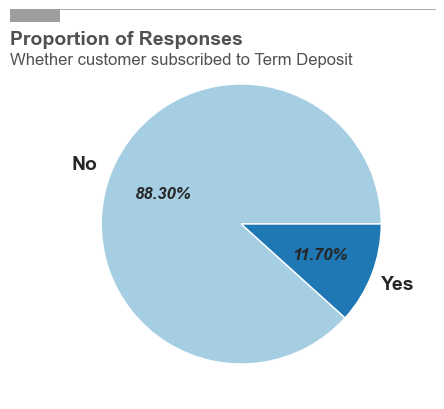

In [8]:
fig, ax = plt.subplots(figsize = (5,5))


patches, texts, autotexts = plt.pie(imbalanced, labels = ('No', 'Yes'),
                                    colors = color, autopct='%.2f%%',
                                   labeldistance =1.2)
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')
    text.set_fontsize(14)
    
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')
    autotext.set_fontsize(12)
   

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.91, s="Proportion of Responses", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.87, s="Whether customer subscribed to Term Deposit", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

### EDA

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
 # proportion of unknown values in each column
unknown_proportion = np.mean(data =='unknown', axis = 0)
unknown_proportion

# columns with unknown data : replace unknown data through random sampling
for col in unknown_proportion.index:
    if unknown_proportion[col]>0:
        
        random_sample = np.random.choice(data.loc[(data[col]!='unknown'),col].value_counts().index,
                                         size = np.sum(data[col]=='unknown'),
                                         p = data.loc[(data[col]!='unknown'),col].value_counts(normalize =True))
        data.loc[(data[col]=='unknown'), col] = random_sample

In [11]:
#applied = data.loc[(data['y']=='yes'),('job','y')].groupby(['job']).count()
applied = data.groupby(['y','job']).size()#.sort_values(ascending =False)
applied

y    job          
no   admin.           4560
     blue-collar      9093
     entrepreneur     1368
     housemaid        1142
     management       8214
     retired          1758
     self-employed    1402
     services         3800
     student           674
     technician       6806
     unemployed       1105
yes  admin.            636
     blue-collar       716
     entrepreneur      125
     housemaid         109
     management       1304
     retired           517
     self-employed     189
     services          372
     student           270
     technician        848
     unemployed        203
dtype: int64

In [12]:
applied =(((data.groupby(['y','job']).size())/(data.groupby(['y']).size()))*100).sort_values(ascending =False)
applied

y    job          
yes  management       24.654944
no   blue-collar      22.776915
     management       20.575121
     technician       17.048244
yes  technician       16.033277
     blue-collar      13.537531
     admin.           12.024957
no   admin.           11.422273
yes  retired           9.775005
no   services          9.518561
yes  services          7.033466
     student           5.104935
no   retired           4.403587
yes  unemployed        3.838155
     self-employed     3.573454
no   self-employed     3.511848
     entrepreneur      3.426682
     housemaid         2.860578
     unemployed        2.767897
yes  entrepreneur      2.363396
     housemaid         2.060881
no   student           1.688292
dtype: float64

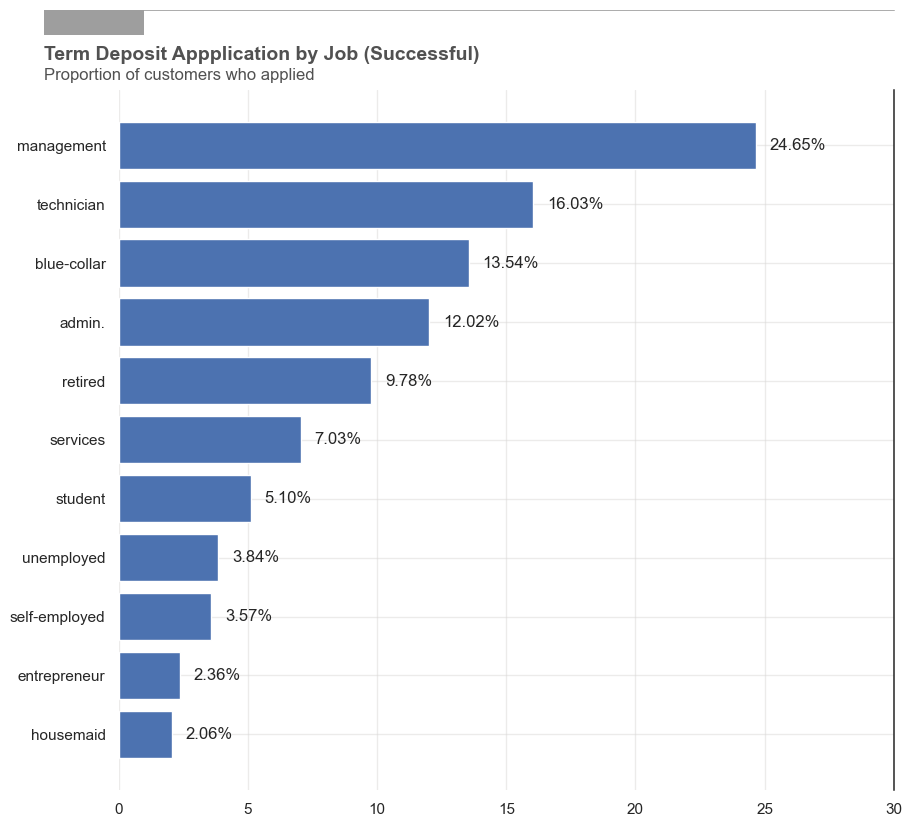

In [13]:
fig, ax = plt.subplots(figsize = (10,10))


graph = ax.barh(applied['yes'].index, applied['yes'])

# add labels
ax.bar_label(graph, fmt='%.2f%%', padding =10, size = 12)
ax.set_xlim(right=30) 

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.93, s="Term Deposit Appplication by Job (Successful)", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Proportion of customers who applied", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)
ax.invert_yaxis()


plt.show()

In [14]:
#applied = data.loc[(data['y']=='yes'),('job','y')].groupby(['job']).count()
applied_job = data.groupby(['job','y']).size()/data.groupby(['job']).size()
applied_job

job            y  
admin.         no     0.877598
               yes    0.122402
blue-collar    no     0.927006
               yes    0.072994
entrepreneur   no     0.916276
               yes    0.083724
housemaid      no     0.912870
               yes    0.087130
management     no     0.862996
               yes    0.137004
retired        no     0.772747
               yes    0.227253
self-employed  no     0.881207
               yes    0.118793
services       no     0.910834
               yes    0.089166
student        no     0.713983
               yes    0.286017
technician     no     0.889208
               yes    0.110792
unemployed     no     0.844801
               yes    0.155199
dtype: float64

In [15]:
applied_job.loc[(slice(None), 'yes')].index

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object', name='job')

In [16]:
#applied = data.loc[(data['y']=='yes'),('job','y')].groupby(['job']).count()
applied_job =data.groupby(['job','y']).size()/data.groupby(['job']).size()

applied_job =pd.DataFrame({'job': applied_job.loc[(slice(None), 'yes')].index,
             'yes': applied_job.loc[(slice(None), 'yes')].values,
             'no': applied_job.loc[(slice(None), 'no')].values})
applied_job = applied_job.sort_values('yes', ascending = False)
applied_job

,job,yes,no
8,student,0.286017,0.713983
5,retired,0.227253,0.772747
10,unemployed,0.155199,0.844801
4,management,0.137004,0.862996
0,admin.,0.122402,0.877598
6,self-employed,0.118793,0.881207
9,technician,0.110792,0.889208
7,services,0.089166,0.910834
3,housemaid,0.087130,0.912870
2,entrepreneur,0.083724,0.916276


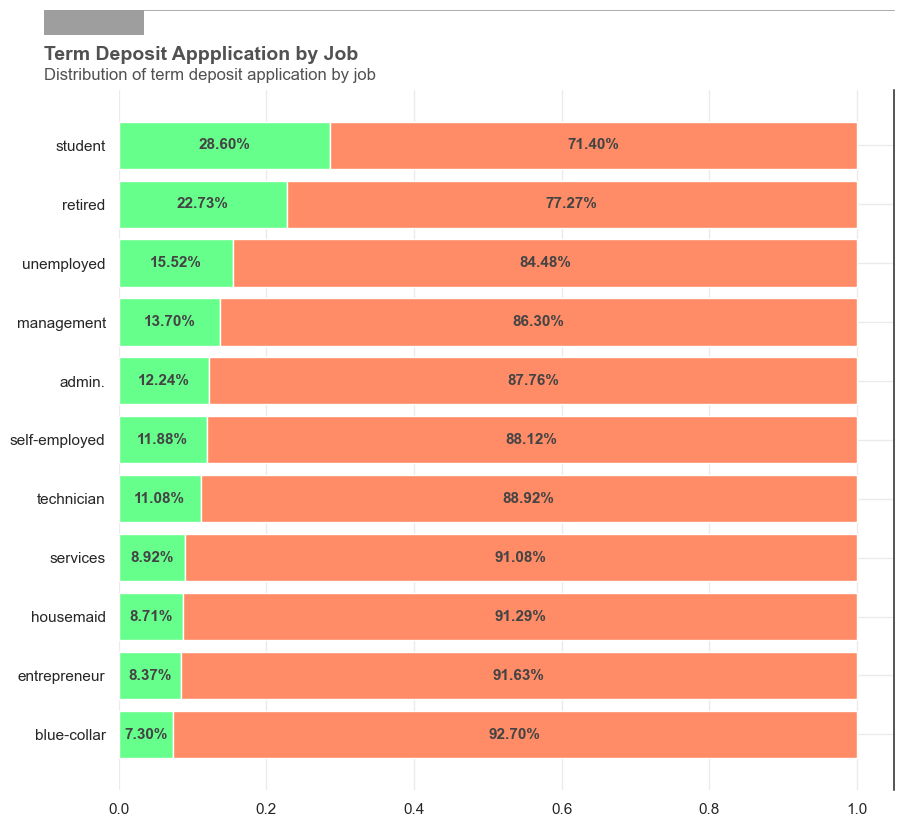

In [17]:
fig, ax = plt.subplots(figsize=(10,10))


yes_values = applied_job.loc[(slice(None), 'yes')].values
no_values = applied_job.loc[(slice(None), 'no')].values

ax.barh(applied_job['job'], applied_job['yes'], color = '#66ff8c', label='Yes')
ax.barh(applied_job['job'], applied_job['no'], color = '#ff8c66', left=applied_job['yes'], label='No')


for i, (j, y, n) in enumerate(zip(applied_job['job'], applied_job['yes'], applied_job['no'])):
    ax.text(y/2, i, "{0:.2%}".format(y), ha='center', va='center', color='#444444', fontsize=11, fontweight='bold')
    ax.text(y + n/2, i, "{0:.2%}".format(n), ha='center', va='center', color='#444444', fontsize=11, fontweight='bold')

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.93, s="Term Deposit Appplication by Job", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Distribution of term deposit application by job", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)
ax.invert_yaxis()


plt.show()

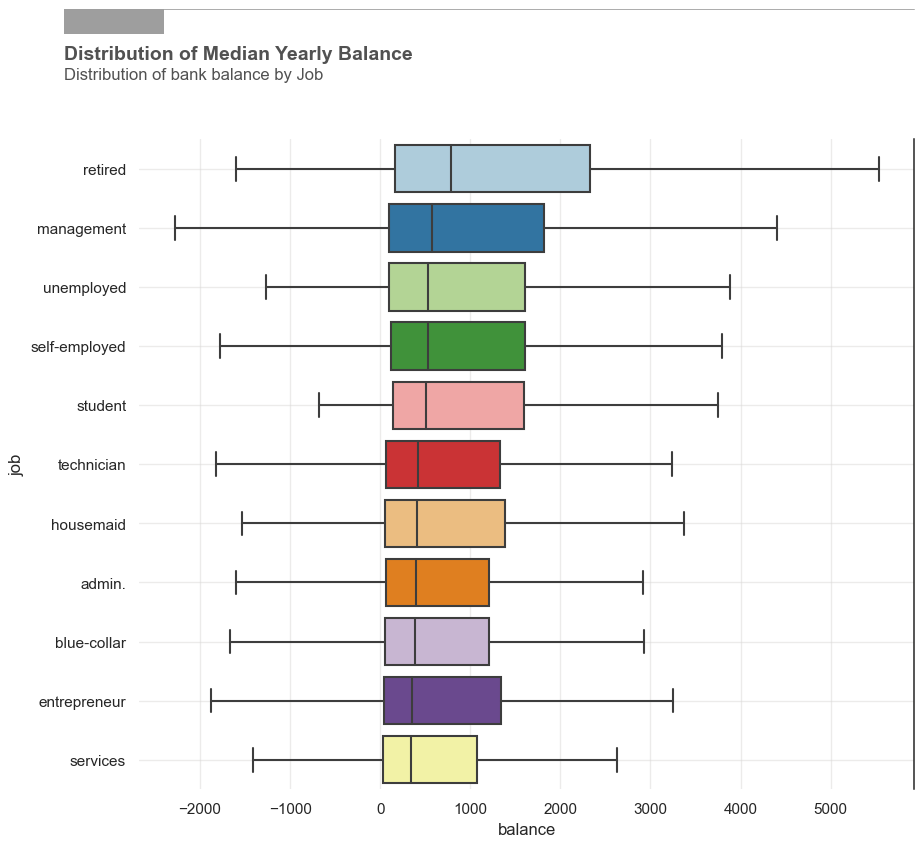

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

sort_median = data.groupby('job')['balance'].median().sort_values(ascending = False).index

sns.boxplot(data=data, x="balance", y="job", palette=color,
            showfliers = False, order = sort_median)


# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.93, s="Distribution of Median Yearly Balance", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Distribution of bank balance by Job", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)



plt.show()

In [19]:
duration = data[['duration','y']]
duration['average'] = duration['duration'].apply(lambda x: 'above average' if x > data['duration'].mean() else 'below average')
duration = (duration.groupby(['average','y']).size()/duration.groupby('y').size())*100
duration

C:\Users\tammy\AppData\Local\Temp\ipykernel_14692\1354911048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration['average'] = duration['duration'].apply(lambda x: 'above average' if x > data['duration'].mean() else 'below average')


average        y  
above average  no     28.067231
               yes    72.357724
below average  no     71.932769
               yes    27.642276
dtype: float64

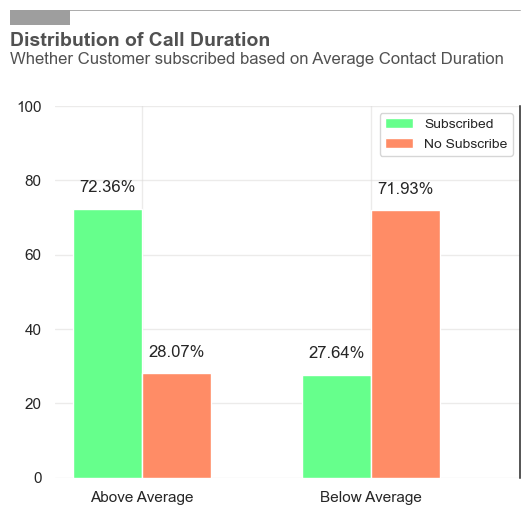

In [20]:
fig, ax = plt.subplots(figsize=(6,6))


widths = 0.1
pos = np.arange(2)/3
graph_sub = ax.bar(pos, duration.loc[(slice(None), 'yes')].values, widths, color = '#66ff8c' , label = 'Subscribed')
graph_no_sub = ax.bar(pos+widths, duration.loc[(slice(None), 'no')].values, widths, color = '#ff8c66', label ='No Subscribe')

# graph label
ax.bar_label(graph_sub, fmt='%.2f%%', padding =10)
ax.bar_label(graph_no_sub, fmt='%.2f%%', padding =10)


# plot x axis labels
plt.xticks(pos + widths/2, ('Above Average', 'Below Average'))
ax.set_xlim(right=0.6)
ax.set_ylim(top=100) 


# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.92, s="Distribution of Call Duration", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.89, s="Whether Customer subscribed based on Average Contact Duration", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.82, wspace=None, hspace=None)
plt.legend( fontsize ='10', facecolor='white')

plt.show()

In [23]:
default = data[['default','y']]
default = (default.groupby(['default','y']).size()/default.groupby(['default']).size())*100
default

default  y  
no       no     88.203892
         yes    11.796108
yes      no     93.619632
         yes     6.380368
dtype: float64

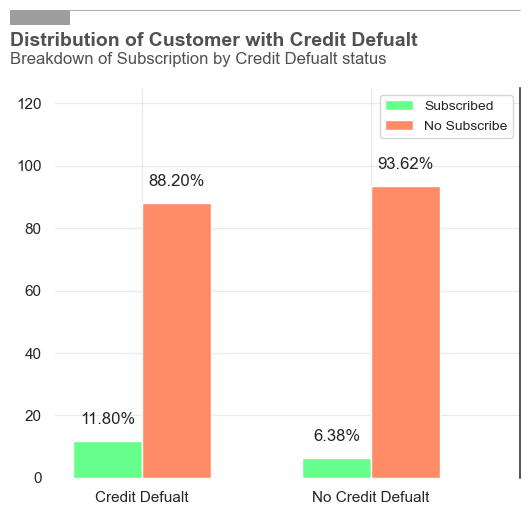

In [24]:
fig, ax = plt.subplots(figsize=(6,6))


widths = 0.1
pos = np.arange(2)/3
graph_sub = ax.bar(pos, default.loc[(slice(None), 'yes')].values, widths, color = '#66ff8c' , label = 'Subscribed')
graph_no_sub = ax.bar(pos+widths, default.loc[(slice(None), 'no')].values, widths, color = '#ff8c66', label ='No Subscribe')

# graph label
ax.bar_label(graph_sub, fmt='%.2f%%', padding =10)
ax.bar_label(graph_no_sub, fmt='%.2f%%', padding =10)


# plot x axis labels
plt.xticks(pos + widths/2, ('Credit Defualt', 'No Credit Defualt'))
ax.set_xlim(right=0.6)
ax.set_ylim(top=125) 


# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.92, s="Distribution of Customer with Credit Defualt", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.89, s="Breakdown of Subscription by Credit Defualt status", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)
plt.legend(fontsize ='10', facecolor='white', loc='upper right')

plt.show()

In [25]:
months = data.groupby('month').size()
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
months

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

C:\Users\tammy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


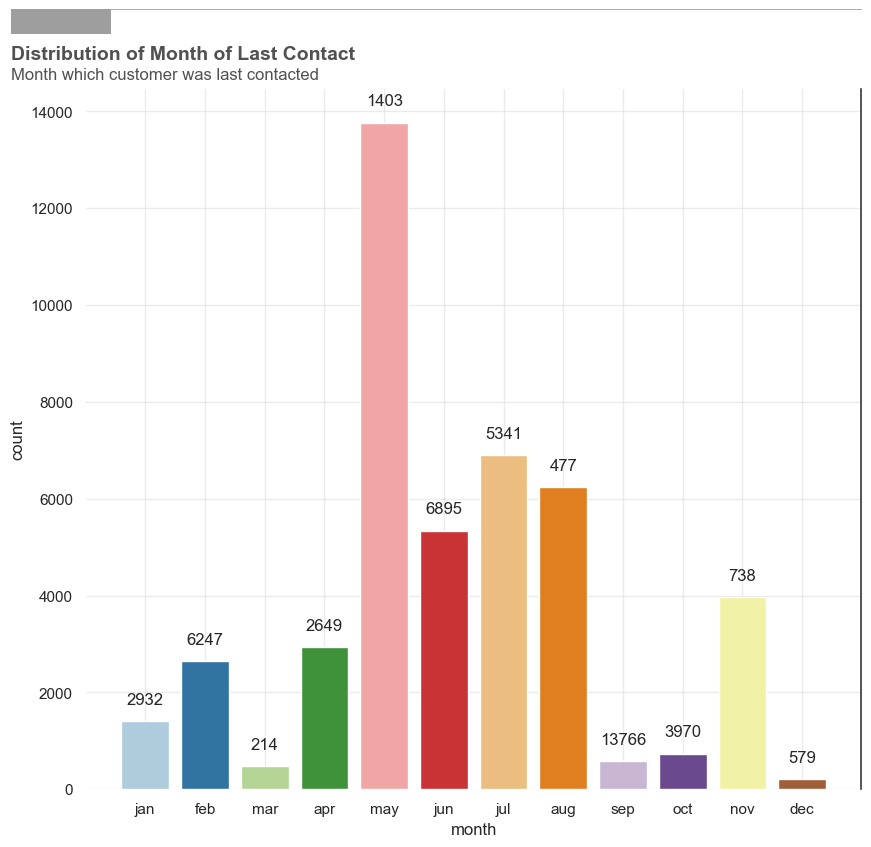

In [26]:
fig, ax = plt.subplots(figsize = (10,10))


ax = sns.countplot('month', data = data, order = month_order, palette=color)

# add Label value
ax.bar_label(container=ax.containers[0], labels =months , fmt='%.2f%%', padding =10)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.93, s="Distribution of Month of Last Contact", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Month which customer was last contacted", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)


plt.show()

In [27]:
months = data.groupby(['month','y']).size()/data.groupby(['month']).size()

months =pd.DataFrame({ 'yes': months.loc[(slice(None), 'yes')].values,
                      'no': months.loc[(slice(None), 'no')].values},
                    index = months.loc[(slice(None), 'yes')].index)
months = months.reindex(month_order)
months

,yes,no
month,,
jan,0.101212,0.898788
feb,0.166478,0.833522
mar,0.519916,0.480084
apr,0.196794,0.803206
may,0.067195,0.932805
jun,0.102228,0.897772
jul,0.090935,0.909065
aug,0.110133,0.889867
sep,0.464594,0.535406


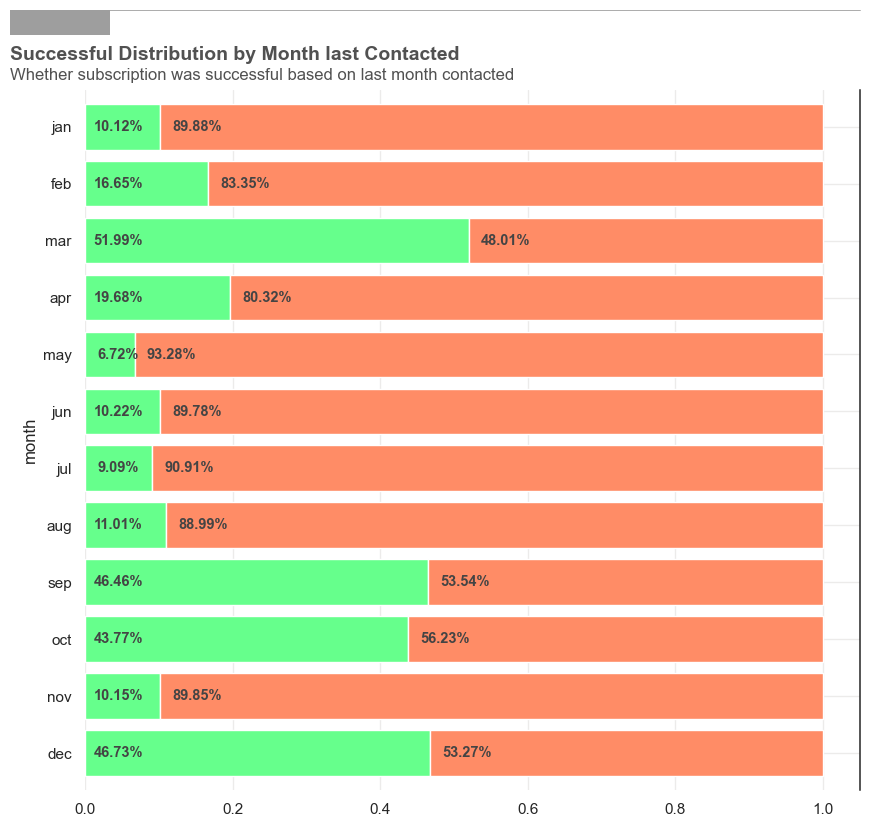

In [31]:
fig, ax = plt.subplots(figsize=(10,10))


months.plot(kind = 'barh', stacked = True, ax=ax, width = 0.8,
           color =['#66ff8c','#ff8c66'], rot=0)


for i, (yes, no) in enumerate(zip(months['yes'], months['no'])):
    ax.text(0.045, i, "{0:.2%}".format(yes) , ha='center', va='center',  color='#444444', fontsize=10.5, fontweight='bold')
    ax.text(yes+0.05, i, "{0:.2%}".format(no), ha='center', va='center',  color='#444444', fontsize=10.5, fontweight='bold')

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in grey line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#9E9E9E', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.1, -0.025, facecolor='#9E9E9E', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add title
ax.text(x=0.05, y=.93, s="Successful Distribution by Month last Contacted", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Whether subscription was successful based on last month contacted", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)
ax.invert_yaxis()
ax.get_legend().remove()

plt.show()